<a href="https://colab.research.google.com/github/Silva-TI/Silva-Nurzanatul-Dahmalena_0110224021_Exploratory-Data-Analysis/blob/main/Praktikum_6_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/Salary_Data_Tugas EDA.xlsx - Sheet1.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [3]:
#Mengecek ukuran datase (jumlah baris dan kolom)
print("Ukuran dataset (baris, kolom):", df.shape)

#Mengecek jumlah total elemen dataset
print("Jumlah total elemen:", df.size)

Ukuran dataset (baris, kolom): (6707, 6)
Jumlah total elemen: 40242


In [4]:
#Mengecek tipe data
my_variable = "Hello"
print("Tipe data my_variable:", type(my_variable))

my_number = 123
print("Tipe data my_number:", type(my_number))

#Mengecek tipe data setiap kolom
print("\nTipe data etiap kolom dalam DataFrsme:")
print(df.dtypes)

Tipe data my_variable: <class 'str'>
Tipe data my_number: <class 'int'>

Tipe data etiap kolom dalam DataFrsme:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [5]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [6]:
#Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

#Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count} ")

#Jika ada duplikat, tampilkan beberapa baris duplikat
if duplicate_rows_count > 0:
  print("\nBeberapa baris duplikat pertama:")
  display(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 4913 

Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
140,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
194,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
208,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0


In [7]:
# Filter kolom-kolom dengan tipe data integer (int64) atau float (float64)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

# Masukkan statistik khusus ke dalam DataFrame ringkasan
descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

# Tampilkan ringkasan statistik
print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


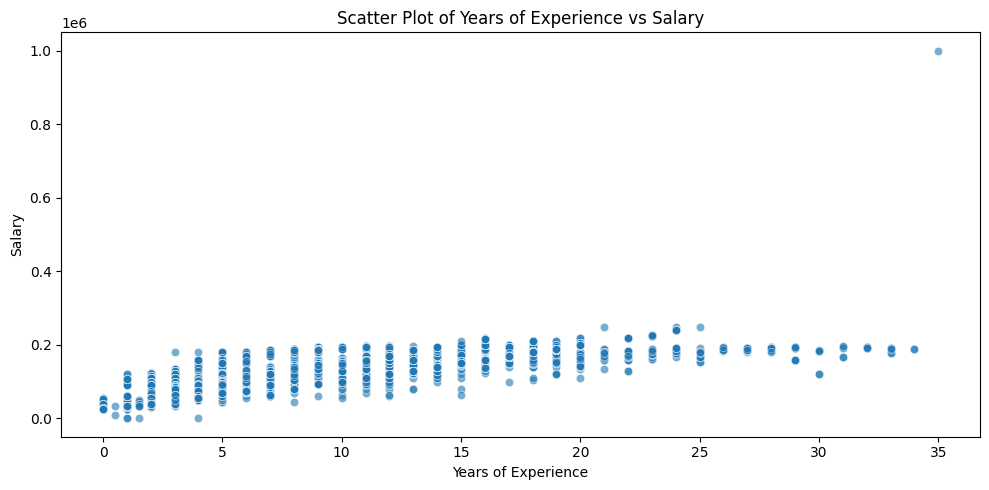

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# CONTOH Visualisasi hubungan antar dua kolom numerik (Scatter Plot)
# Kita bisa memilih kolom yang relevan, misalnya Years of Experience vs Salary
numerical_cols_scatter = ['Years of Experience', 'Salary']

# Set ukuran figure
plt.figure(figsize=(10, 5))

# Buat Scatter Plot
# x= kolom pertama, y=kolom kedua
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], alpha=0.6)

# Beri Judul dan Label Sumbu
plt.title(f'Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])

# Penyesuaian tata letak dan tampilkan plot
plt.tight_layout()
plt.show()

In [9]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada lagi baris duplikat
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan duplikat
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama DataFrame setelah penghapusan duplikat:")
    display(df.head())

Jumlah baris duplikat: 4913

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan duplikat:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [10]:
# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())


Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    508
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1794.000000,1792.000000,1790.000000
mean,35.140468,9.162109,113668.149162
std,8.232829,6.866281,55695.750262
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


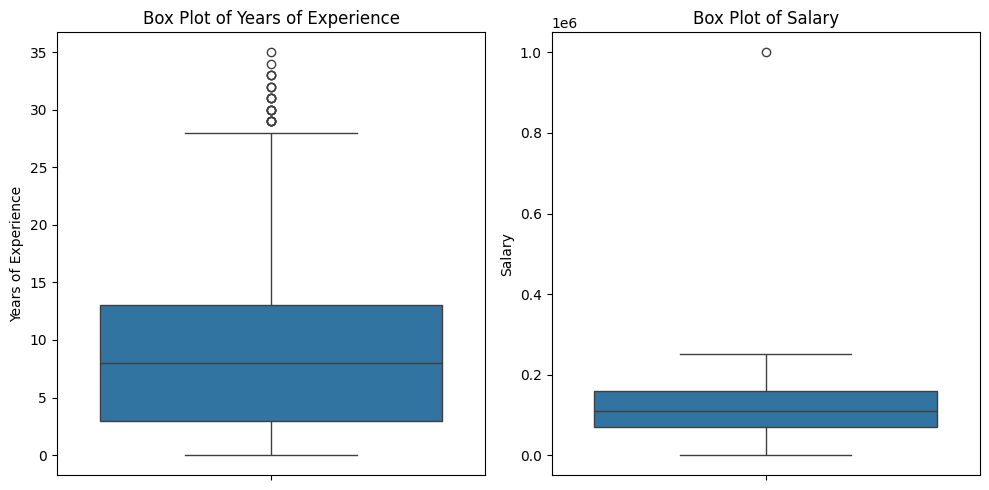

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi kolom numerik untuk mendeteksi outlier (Box Plot)
numerical_cols_outliers = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    # Use the DataFrame after outlier removal (created in the cell above)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Jumlah baris sebelum penghapusan outlier: 1789
Jumlah baris setelah penghapusan outlier: 1766


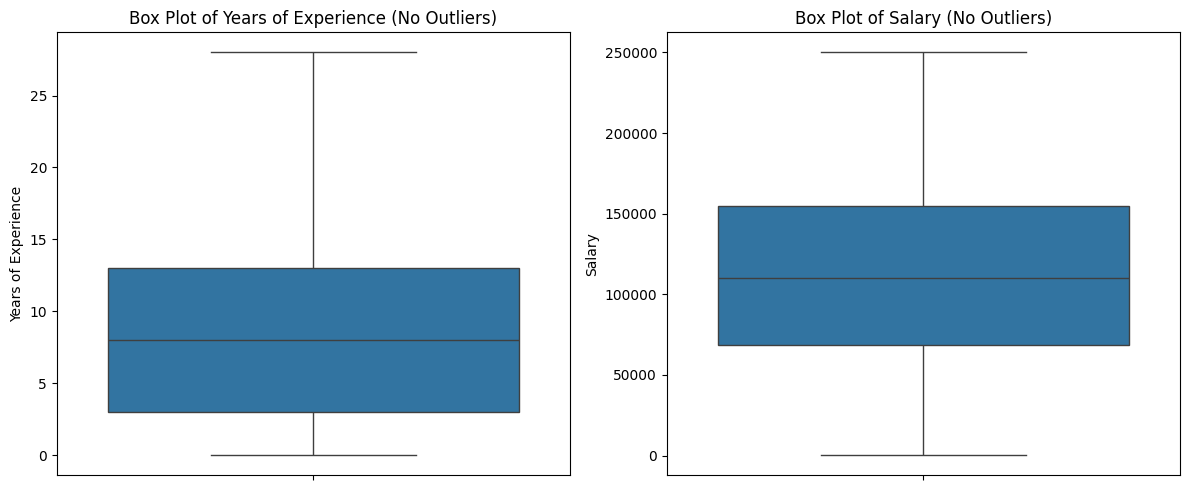

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# --- 1. Pembersihan Nilai Hilang (NaN) ---
# Menghapus baris yang memiliki NaN pada kolom utama yang akan divisualisasikan
df_cleaned = df.dropna(subset=['Years of Experience', 'Salary'])

# --- 2. Penghapusan Outlier dengan Metode IQR ---
numerical_cols_outliers = ['Years of Experience', 'Salary']
df_no_outliers = df_cleaned.copy()

print(f"Jumlah baris sebelum penghapusan outlier: {len(df_cleaned)}")

for col in numerical_cols_outliers:
    # Hitung Q1, Q3, dan IQR
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame untuk mempertahankan data di dalam batas (bukan outlier)
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) &
        (df_no_outliers[col] <= upper_bound)
    ]

print(f"Jumlah baris setelah penghapusan outlier: {len(df_no_outliers)}")

# --- 3. Visualisasi Box Plot dari Data Bersih ---
plt.figure(figsize=(12, 5))

for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    # Gunakan df_no_outliers yang sudah bersih dari outlier
    sns.boxplot(data=df_no_outliers, y=col)
    plt.title(f'Box Plot of {col} (No Outliers)')
    plt.ylabel(col)

plt.tight_layout()
plt.show() # Tampilkan plot
# plt.savefig('box_plot_no_outliers_final.png') # Optional: Simpan plot

# Anda sekarang dapat menggunakan df_no_outliers untuk analisis selanjutnya.


Statistik deskriptif untuk 'Salary' setelah capping (upper limit = 200000):


,Salary
count,1790.000000
mean,112974.853073
std,51151.419023
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,200000.000000


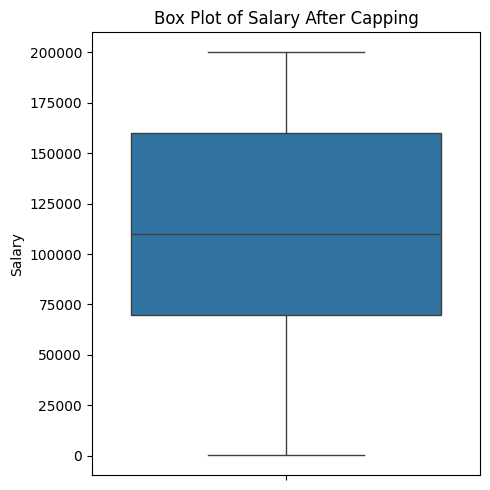

In [16]:
# Handle outliers in 'Salary' using capping
# determine a reasonable upper limit (e.g., based on the 95th percentile or visual inspection)
# from the describe output, the max is 1000000.0, while 75% is around 160000.0.
# let's cap at a value slightly above the 75th percentile, e.g., 200000.
upper_limit = 200000

# Create a copy to avoid SettingWithCopyWarning
df_cleaned = df.copy()

df_cleaned['Salary'] = df_cleaned['Salary'].clip(upper=upper_limit)

print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper limit = {upper_limit}):")
display(df_cleaned['Salary'].describe())

# Visualisasi 'Salary' setelah capping (Box Plot)
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_cleaned, y='Salary')
plt.title('Box Plot of Salary After Capping')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [17]:
#  --- menampilkan beberapa baris duplikat pertama jika ada ---
if duplicate_rows_count > 0:
   print("\nBeberapa baris duplikat pertama:")
display(df[df.duplicated (keep=False)].head())


Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [18]:
output_file_name = 'data_bersih_salary.xlsx'
df.to_excel(output_file_name, index=False)

print(f"DataFrame telah berhasil disimpan ke '{output_file_name}'")

DataFrame telah berhasil disimpan ke 'data_bersih_salary.xlsx'


# **Cleansing**

In [19]:
import pandas as pd
import numpy as np

# To read .xlsx files, you may need to install the openpyxl library:
# pip install openpyxl

df = pd.read_excel('/content/data_bersih_salary.xlsx')

# Mengkonversi Salary dan Years of Experience ke numerik; errors='coerce' akan mengubah data tidak valid menjadi NaN
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

# 3. Penerapan Logika Kode Anda pada kolom 'Salary'

# Hitung jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan
missing_values_before_drop = df['Salary'].isnull().sum()
print(f"Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: **{missing_values_before_drop}**")

# Hapus baris dengan nilai yang hilang di kolom 'Salary'
# Kita membuat DataFrame baru (df_dropped) agar DataFrame asli (df) tidak berubah
df_dropped = df.dropna(subset=['Salary']).copy()

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Salary'
missing_values_after_drop = df_dropped['Salary'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: **{missing_values_after_drop}**")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan
print("\nBeberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:")
display(df_dropped.head())

# Tampilkan perbedaan ukuran DataFrame
original_shape = df.shape
new_shape = df_dropped.shape
print(f"\nUkuran DataFrame Awal: {original_shape}")
print(f"Ukuran DataFrame setelah penghapusan baris: {new_shape}")
print(f"Jumlah baris yang dihapus: {original_shape[0] - new_shape[0]}")

Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: **4**

Jumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: **0**

Beberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0



Ukuran DataFrame Awal: (1794, 6)
Ukuran DataFrame setelah penghapusan baris: (1790, 6)
Jumlah baris yang dihapus: 4


In [20]:
# Tentukan batas atas untuk outlier (sesuai dengan yang tidak rentan ambangya)
upper_limit = 20000000

# Hitung jumlah baris sebelum penghapusan outlier
rows_before_drop = len(df)
print(f"Jumlah baris sebelum menghapus outlier: {rows_before_drop}")

# Hapus baris di kolom 'Salary' lebih besar dari batas atas
df_no_outliers = df[df['Salary'] <= upper_limit].copy()

# Hitung jumlah baris setelah penghapusan outlier
rows_after_drop = len(df_no_outliers)
print(f"\nJumlah baris setelah menghapus outlier di 'Salary': {rows_after_drop}")
print(f"Jumlah outlier yang dihapus: {rows_before_drop - rows_after_drop}")

# Tampilkan statistik deskriptif untuk 'Salary' setelah penghapusan outlier
print("\nStatistik deskriptif untuk 'Salary' setelah menghapus outlier:")
display(df_no_outliers['Salary'].describe())

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan outlier
print("\nBeberapa baris pertama DataFrame setelah menghapus outlier:")
display(df_no_outliers.head())

Jumlah baris sebelum menghapus outlier: 1794

Jumlah baris setelah menghapus outlier di 'Salary': 1790
Jumlah outlier yang dihapus: 4

Statistik deskriptif untuk 'Salary' setelah menghapus outlier:


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000



Beberapa baris pertama DataFrame setelah menghapus outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [21]:
# Calculate the correlation between 'Years of Experience' and 'Salary'

correlation = df['Years of Experience'].corr(df['Salary'])

r_squared = correlation**2

print(f"Koefisien Korelasi (r) antara Years of Experience dan Salary: **{correlation:.4f}**")
print(f"Koefisien Determinasi (R-Squared) antara Years of Experience dan Salary: **{r_squared:.4f}**")

print("\n--- Interpretasi ---")
print(f"Nilai R-Squared sebesar {r_squared:.4f} berarti {r_squared*100:.2f}% dari variasi Gaji")
print("dapat dijelaskan oleh variabel Tahun Pengalaman dalam model linier.")

Koefisien Korelasi (r) antara Years of Experience dan Salary: **0.7890**
Koefisien Determinasi (R-Squared) antara Years of Experience dan Salary: **0.6225**

--- Interpretasi ---
Nilai R-Squared sebesar 0.6225 berarti 62.25% dari variasi Gaji
dapat dijelaskan oleh variabel Tahun Pengalaman dalam model linier.


In [22]:
# Hitung jumlah nilai yang hilang di kolom 'Salary' dan 'Years of Experience' sebelum penghapusan
missing_values_before_drop_salary = df['Salary'].isnull().sum()
missing_values_before_drop_experience = df['Years of Experience'].isnull().sum()

print(f"Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: {missing_values_before_drop_salary}")
print(f"Jumlah nilai yang hilang di kolom 'Years of Experience' sebelum penghapusan: {missing_values_before_drop_experience}")


# Hapus baris dengan nilai yang hilang di kolom 'Salary' atau 'Years of Experience'
df_cleaned = df.dropna(subset=['Salary', 'Years of Experience']).copy()


# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Salary' atau 'Years of Experience'
missing_values_after_drop_salary = df_cleaned['Salary'].isnull().sum()
missing_values_after_drop_experience = df_cleaned['Years of Experience'].isnull().sum()

print(f"\nJumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: {missing_values_after_drop_salary}")
print(f"Jumlah nilai yang hilang di kolom 'Years of Experience' setelah penghapusan: {missing_values_after_drop_experience}")


# Tampilkan beberapa baris pertama DataFrame setelah penghapusan
print("\nBeberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:")
display(df_cleaned.head())

print(f"\nUkuran DataFrame setelah penghapusan nilai yang hilang: {df_cleaned.shape}")
print(f"Jumlah baris yang dihapus: {df.shape[0] - df_cleaned.shape[0]}")

Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: 4
Jumlah nilai yang hilang di kolom 'Years of Experience' sebelum penghapusan: 2

Jumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: 0
Jumlah nilai yang hilang di kolom 'Years of Experience' setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0
6,42,Female,Master's,Product Manager,12.0,120000.0



Ukuran DataFrame setelah penghapusan nilai yang hilang: (1789, 6)
Jumlah baris yang dihapus: 5


Hasil Uji Shapiro-Wilk: statistik=0.8798, p-value=0.0000
Data tidak berdistribusi normal (menolak H0)


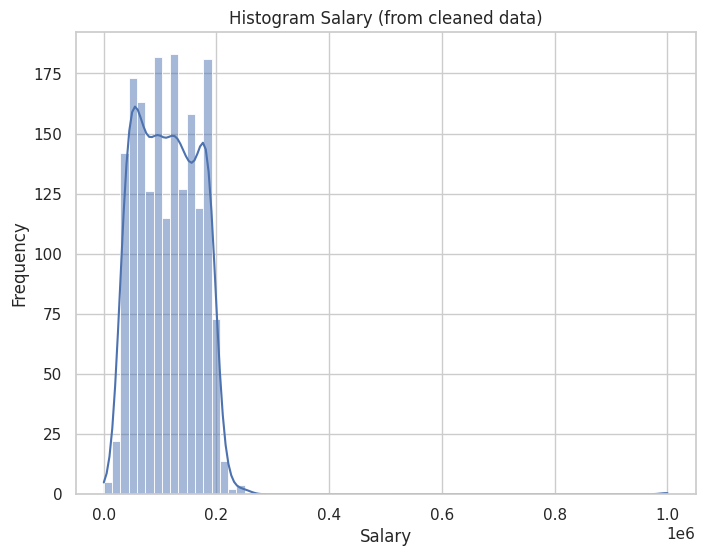

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Use df_cleaned for Shapiro-Wilk test since it has no NaNs in 'Salary'
shapiro_test= stats.shapiro(df_no_outliers['Salary'])
print(f"Hasil Uji Shapiro-Wilk: statistik={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
  print("Data kemungkinan berdistribusi normal ( gagal menolak H0)")
else:
  print("Data tidak berdistribusi normal (menolak H0)")

plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Salary'], kde=True)
plt.title('Histogram Salary (from cleaned data)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()